In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv('data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
# changing the column names to lower case and replacing spaces with underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
# showing the categorical variables
cat_var = [var for var in df.columns if df[var].dtypes == 'object']
cat_var

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [5]:
# changing the values of the categorical variables into lower case and replacing spaces with underscore
for cols in cat_var:
    df[cols] = df[cols].str.lower().str.replace(' ', '_')
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [6]:
# finding missing values
missing_var = [var for var in df.columns if df[var].isnull().sum()] 
missing_var

['engine_fuel_type',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'market_category']

In [7]:
# filling missing values with the most frequent values
imputer = SimpleImputer(missing_values = np.nan, strategy= 'most_frequent')
df[missing_var] = imputer.fit_transform(df[missing_var])
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [8]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [9]:
# printing number of unique values for categorical variables
for cols in cat_var:
    print(cols)
    print(df[cols].nunique())

make
48
model
914
engine_fuel_type
10
transmission_type
5
driven_wheels
4
market_category
71
vehicle_size
3
vehicle_style
16


In [10]:
# mapping unique values to thier value count
for var in cat_var:
    df[var] = df[var].map(df[var].value_counts())
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,334,1,2011,2009,335.0,6.0,2935,3371,2.0,215,4764,1211,26,19,3916,46135
1,334,16,2011,2009,300.0,6.0,2935,3371,2.0,673,4764,793,28,19,3916,40650
2,334,16,2011,2009,300.0,6.0,2935,3371,2.0,334,4764,1211,28,20,3916,36350
3,334,16,2011,2009,230.0,6.0,2935,3371,2.0,673,4764,1211,28,18,3916,29450
4,334,16,2011,2009,230.0,6.0,2935,3371,2.0,855,4764,793,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,252,7,2012,2009,300.0,6.0,8266,2353,4.0,7,4373,702,23,16,204,46120
11910,252,7,2012,2009,300.0,6.0,8266,2353,4.0,7,4373,702,23,16,204,56670
11911,252,7,2012,2009,300.0,6.0,8266,2353,4.0,7,4373,702,23,16,204,50620
11912,252,7,2013,1523,300.0,6.0,8266,2353,4.0,7,4373,702,23,16,204,50920


In [11]:
# seperating independent and target variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

C:\Users\ajana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

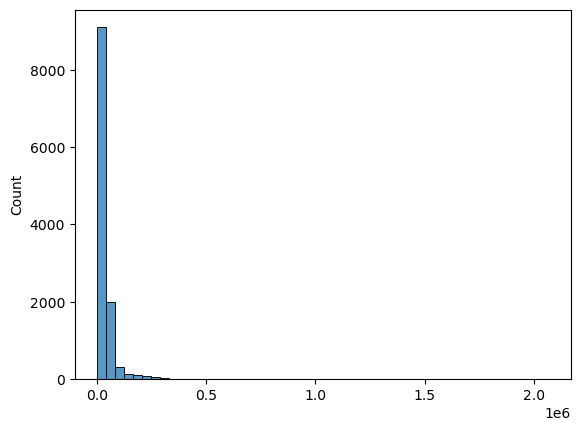

In [12]:
sns.histplot(y, bins = 50)

In [13]:
y= np.log1p(y)
y

array([10.73934884, 10.61277871, 10.50097699, ..., 10.83212179,
       10.83803069, 10.27491317])

C:\Users\ajana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

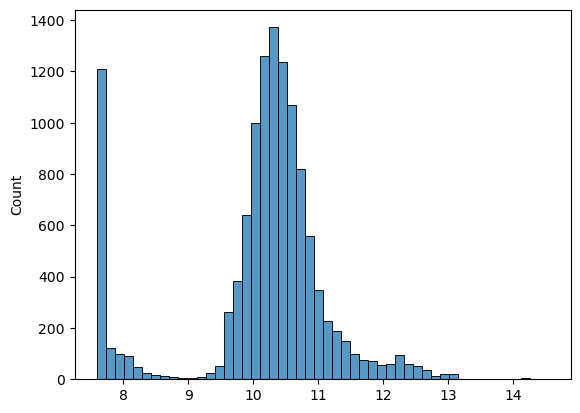

In [14]:
sns.histplot(y, bins = 50)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [16]:
# training on linear regression model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [17]:
# training on decision tree model
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
#prediction with Linear Regression model
prediction_1 = model_1.predict(X_test)

In [19]:
# comparing the actual values with predicted values of Linear Regression
comparing_m1 = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': prediction_1})
comparing_m1

,Actual Values,Predicted Values
0,10.298768,9.606765
1,10.325351,10.060234
2,10.536115,10.608692
3,9.690975,9.811879
4,7.601402,7.816421
...,...,...
2378,10.478724,9.863552
2379,10.786449,10.717186
2380,10.365679,10.376459
2381,9.952087,10.007212


In [20]:
# prediction with Decision tree model
prediction_2 = model_2.predict(X_test)

In [21]:
# comparing actual values to the predicted values of Decision Tree model
comparing_m2 = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': prediction_2})
comparing_m2

,Actual Value,Predicted Value
0,10.298768,10.428541
1,10.325351,10.182074
2,10.536115,10.518114
3,9.690975,9.783915
4,7.601402,7.601402
...,...,...
2378,10.478724,10.572811
2379,10.786449,11.022631
2380,10.365679,10.205479
2381,9.952087,9.932852


In [22]:
# metrics of linear regression
R2_m1 = r2_score(y_test, prediction_1)
mae_m1 = mean_absolute_error(y_test, prediction_1)
mse_m1 = mean_squared_error(y_test, prediction_1)
mape_m1 = mean_absolute_percentage_error(y_test, prediction_1)

In [23]:
print(f'R2 score is: {R2_m1}')
print(f'Mean Absolute Error is: {mae_m1}')
print(f'Mean Squared error is: {mse_m1}')
print(f'Mean Absolute Percentage Error is: {mape_m1}')

R2 score is: 0.8152094541408066
Mean Absolute Error is: 0.3670998341730458
Mean Squared error is: 0.23366756629222407
Mean Absolute Percentage Error is: 0.03787276222228521


In [24]:
# metrics of Decisoin tree
R2_m2 = r2_score(y_test, prediction_2)
mae_m2 = mean_absolute_error(y_test, prediction_2)
mse_m2 = mean_squared_error(y_test, prediction_2)
mape_m2 = mean_absolute_percentage_error(y_test, prediction_2)

In [25]:
print(f'R2 score is: {R2_m2}')
print(f'Mean Absolute Error is: {mae_m2}')
print(f'Mean Squared error is: {mse_m2}')
print(f'Mean Absolute Percentage Error is: {mape_m2}')

R2 score is: 0.987281959655505
Mean Absolute Error is: 0.077247504351238
Mean Squared error is: 0.016081956582177655
Mean Absolute Percentage Error is: 0.007592220899877204
